<a href="https://colab.research.google.com/github/ricaiu/MLPNS2021/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
from scipy.optimize import curve_fit, minimize
    
%pylab inline
# this package sets up pretty plots
import seaborn
seaborn.set_style("darkgrid")

Populating the interactive namespace from numpy and matplotlib


In [2]:

#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']

In [15]:

mymean = 100
df = mymean
p_binomial=1/2
n_binomial=int(mymean/p_binomial)

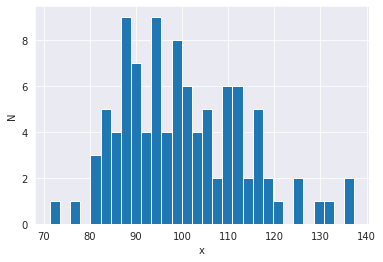

In [16]:
import numpy as np
np.random.seed(456)
md = {}
# md is an empty disctionary; 
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
md['chisq'] = np.random.chisquare(df, size=100)
md['gaus'] = np.random.normal(mymean, size=100)
md['pois'] = np.random.poisson(mymean, size=100)
md['binomial'] = np.random.binomial(n_binomial,p_binomial, size=100)
md['laplace'] = np.random.laplace(mymean, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

In [7]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.09, standard deviation: 13.24


In [8]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

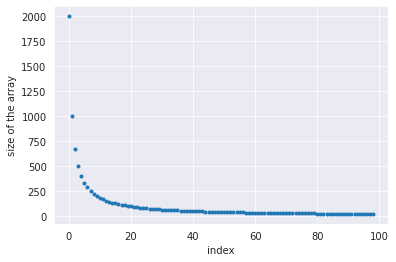

In [9]:

pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")


Text(1259.3999999999999, 100, 'expected mean')

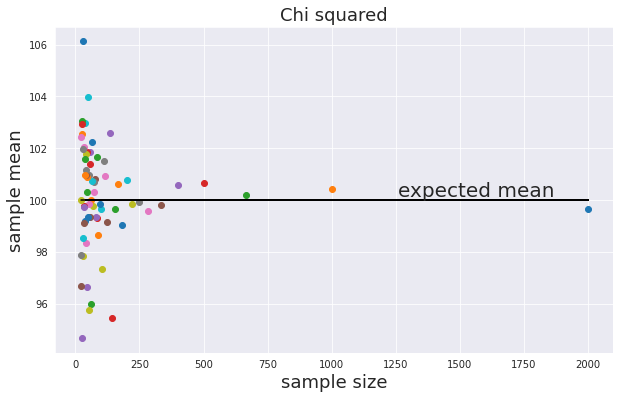

In [10]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Text(0, 0.5, 'N')

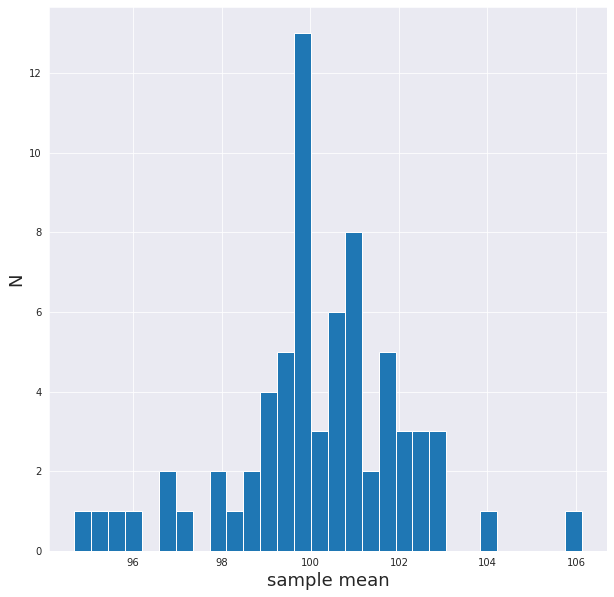

In [11]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)